In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
%matplotlib inline

In [ ]:
#mengambil dataset dan menampilkannya
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prak-apm5/Gaa.csv")

In [ ]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,0,18,5,College,Operations,2,42363,9938
1,Software Engineer,1,21,5,College,Management,5,108476,11128
2,Warehouse Associate,0,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,1,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,1,26,5,Masters,Engineering,5,99464,9319


In [ ]:
#menghapus kolom yang tidak diperlukan dan menampilkan kembali
df.drop(['JobTitle','PerfEval','Education','Dept','Bonus'],axis=1,inplace=True)
df.head()

,Gender,Age,Seniority,BasePay
0,0,18,2,42363
1,1,21,5,108476
2,0,19,5,90208
3,1,20,4,108080
4,1,26,5,99464


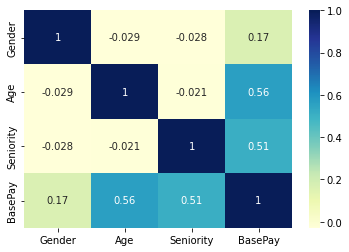

In [ ]:
#menampilkan  Seaborn Correlation Heatmap
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [ ]:
#mempersiapkan fungsi PCA dan menampilkan jumlah baris pada dataset
pca = PCA(n_components=2)
df= pca.fit_transform(df)
df.shape

(1000, 2)

In [ ]:
#mempersiapkan fungsi Kmeans
km= KMeans(n_clusters=3,random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [ ]:
#mempersiapkan tabel dan menampilkannya
label = km.fit_predict(df)
label

array([0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,

In [ ]:
label_0 = df[label == 0]
label_0.shape

(301, 2)

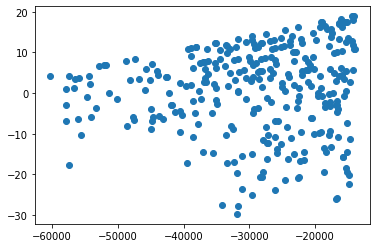

In [ ]:
#menampilkan visualisasi scatter
plt.scatter(label_0[:,0],label_0[:,1])
plt.show()

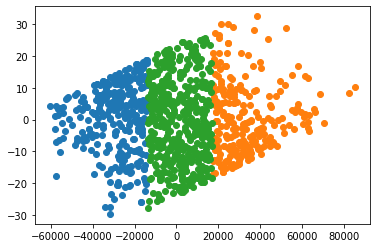

In [ ]:
#menampilkan label2 yang telah dipisah dengan warda berbeda

label_0 = df[label == 0]
label_1 = df[label == 1]
label_2 = df[label == 2]

plt.scatter(label_0[:,0],label_0[:,1])
plt.scatter(label_1[:,0],label_1[:,1])
plt.scatter(label_2[:,0],label_2[:,1])

plt.show()

In [ ]:
#mempersiapan statistik  'Sum of Squared Error'
sse= []
for k in range(1,10):
    km= KMeans(n_clusters=k,random_state=42)
    km.fit_predict(df)
    sse.append(km.inertia_)
sse

[641346781681.3687,
 224925811137.09555,
 115912071130.10155,
 69886436394.53726,
 49340130374.238434,
 33655722420.262566,
 25012520874.955467,
 18717232861.223373,
 15056557984.486355]

Text(0, 0.5, 'Sum of Squared Error')

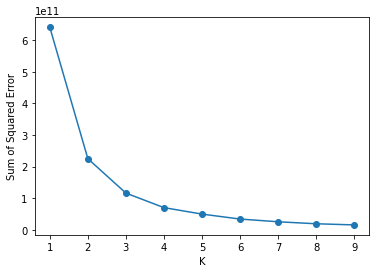

In [ ]:
#menampilkan visualisasi 'Sum of Squared Error'
plt.plot(range(1,10),sse,marker='o')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

In [ ]:
#mempersiapkan inisiasi untuk kmeans
km = KMeans(n_clusters=5,random_state=42)
label = km.fit_predict(df)

u_labels= np.unique(label)

centroids= km.cluster_centers_
centroids

array([[ 4.90671210e+03, -8.39158575e-01],
       [-1.39761161e+04,  7.38362214e-01],
       [ 2.47137222e+04, -3.94636915e-01],
       [-3.67411665e+04, -5.24214371e-02],
       [ 5.00716489e+04,  1.95802481e+00]])

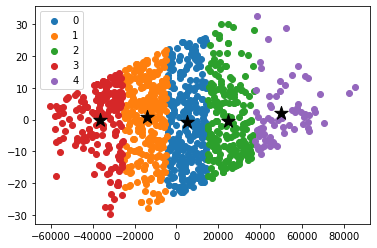

In [ ]:
#menampilkan inisiasi dan data yang telah di pisahkan dengan plot scatter
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.legend()
plt.scatter(centroids[:,0] , centroids[:,1] , s=200, color = 'k',marker='*')   
plt.show()
